In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

In [2]:
sc.settings.verbosity = 3
# sc.settings.set_figure_params(dpi=100)
sns.set(color_codes=True)

In [3]:
# Configure data path
data_path = 'dataset/'

###  Load dataset

In [168]:
%%bash 
# ls -al dataset/

In [46]:
raw_counts = pd.read_csv(data_path + 'GSE89567_IDH_A_processed_data.txt.gz', compression='gzip', sep='\t', index_col=0)
raw_counts.index = [gene.strip("'") for gene in raw_counts.index]
raw_counts.head()

,MGH42_P7_A01,MGH42_P7_A02,MGH42_P7_A03,MGH42_P7_A04,MGH42_P7_A05,MGH42_P7_A07,MGH42_P7_A09,MGH42_P7_A11,MGH42_P7_A12,MGH42_P7_B02,...,MGH107neg_P2_E06,MGH107pos_P2_B03,MGH107neg_P1_F03,MGH107neg_P1_G06,MGH107neg_P2_H03,MGH107neg_P2_C05,MGH107pos_P2_D07,MGH107neg_P1_E01,MGH107pos_P2_G09,MGH107neg_P1_D06
A1BG,1.1928,0.000000,0.00000,0.0000,0.0000,0.66903,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,2.4772,0.0000,0.0
A1BG-AS1,0.0000,0.000000,0.00000,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.83996,0.0000,0.0000,0.0000,0.0
A1CF,0.0000,0.094912,0.00000,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0
A2M,7.0439,7.609500,0.77062,7.6146,0.0000,0.00000,0.27501,8.1624,6.5655,6.9658,...,0.0,8.6046,0.0,0.0,0.0,0.00000,9.5281,0.0000,6.8999,0.0
A2M-AS1,0.0000,0.000000,0.00000,0.0000,2.0339,2.39420,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0


### Library size plot

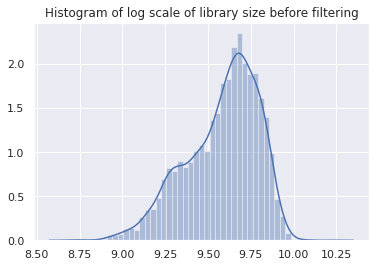

In [7]:
libsize = raw_counts.sum(0)
sns.distplot(np.log1p(libsize))
plt.title('Histogram of log scale of library size before filtering')
plt.show()

### Gexp plot

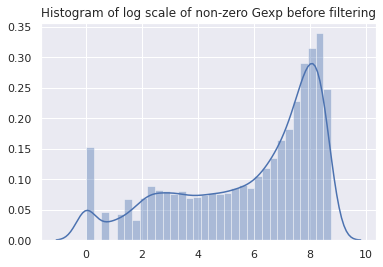

In [9]:
n_cells_per_gene = raw_counts.apply(lambda x: (x > 0).sum(), axis=1)
sns.distplot(np.log1p(n_cells_per_gene))
plt.title('Histogram of log scale of non-zero Gexp before filtering')
plt.show()

### Load batch effect denoised $\&$ log-normalized matrix 

In [68]:
mtx = pd.read_csv(data_path + 'GSE89567_normalized_batchcorrected.csv.gz', compression='gzip', index_col=[0])
mtx.head()

,MGH42_P7_A01,MGH42_P7_A02,MGH42_P7_A03,MGH42_P7_A04,MGH42_P7_A05,MGH42_P7_A07,MGH42_P7_A09,MGH42_P7_A11,MGH42_P7_A12,MGH42_P7_B02,...,MGH107neg_P2_E06,MGH107pos_P2_B03,MGH107neg_P1_F03,MGH107neg_P1_G06,MGH107neg_P2_H03,MGH107neg_P2_C05,MGH107pos_P2_D07,MGH107neg_P1_E01,MGH107pos_P2_G09,MGH107neg_P1_D06
'A1BG',1.187306,-0.026585,-0.016561,-0.023655,-0.017968,0.440905,-0.019386,-0.025668,-0.029796,-0.027891,...,0.034473,0.045309,0.034028,0.035759,0.040779,0.033050,0.051670,2.074615,0.052273,0.036441
'A1BG-AS1',0.012710,0.013485,0.008401,0.011999,0.009114,0.008556,0.009833,0.013020,0.015114,0.014147,...,0.048256,0.063424,0.047633,0.050056,0.057084,0.807847,0.072329,0.047396,0.073173,0.051011
'A1CF',-0.004258,0.103494,-0.002814,-0.004019,-0.003053,-0.002866,-0.003294,-0.004361,-0.005063,-0.004739,...,0.002579,0.003390,0.002546,0.002675,0.003051,0.002473,0.003866,0.002533,0.003911,0.002726
'A2M',6.049037,6.974504,0.153306,6.210234,-0.346092,-0.324905,-0.176107,7.259118,6.665734,6.652558,...,-0.038855,8.218396,-0.038353,-0.040304,-0.045963,-0.037252,10.384298,-0.038163,7.591422,-0.041074
'A2M-AS1',-0.039227,-0.041620,-0.025927,-0.037032,1.378180,1.527687,-0.030349,-0.040184,-0.046647,-0.043663,...,0.014730,0.019360,0.014540,0.015279,0.017425,0.014122,0.022078,0.014467,0.022336,0.015571


In [69]:
# Reformat mtx: tranpose to cell x gene; remove all '' in gene names
mtx = mtx.transpose()
mtx.index.name = 'Cell_ID'
mtx.columns = [gene.strip("'") for gene in mtx.columns]
mtx.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Cell_ID,,,,,,,,,,,,,,,,,,,,,
MGH42_P7_A01,1.187306,0.012710,-0.004258,6.049037,-0.039227,-0.007474,-0.006710,0.000170,-0.003314,0.132913,...,-0.081958,-0.061733,-0.033487,0.120649,0.394543,0.015051,0.228959,2.849762,0.665783,0.172060
MGH42_P7_A02,-0.026585,0.013485,0.103494,6.974504,-0.041620,-0.007930,-0.007119,0.000181,-0.003516,0.141021,...,0.199992,-0.065499,-0.035530,0.010998,0.610772,0.457398,0.437343,2.302114,1.241416,0.182556
MGH42_P7_A03,-0.016561,0.008401,-0.002814,0.153306,-0.025927,0.185482,-0.004435,0.000112,-0.002190,2.032715,...,0.239227,2.073560,-0.022133,1.666270,0.718609,0.362348,2.151582,-0.149764,-0.113520,3.089583
MGH42_P7_A04,-0.023655,0.011999,-0.004019,6.210234,-0.037032,0.439550,-0.006334,0.000161,-0.003128,0.125477,...,-0.077373,0.506154,-0.031614,0.009786,1.052911,0.173726,1.429455,3.914058,-0.162144,0.162434
MGH42_P7_A05,-0.017968,0.009114,-0.003053,-0.346092,1.378180,0.213175,-0.004811,0.000122,-0.002376,1.789374,...,-0.058771,-0.044268,-0.024013,0.007433,2.533618,0.393123,3.021277,2.957805,1.182362,4.843932


In [38]:
# Load inferred cluster annotations 
annotation = pd.read_csv(data_path + 'GSE89567_annotation_in_leiden.csv', delimiter=',', index_col=[0])
annotation['batch'] = annotation['batch'].apply(lambda x: x.strip('_'))
annotation.head()

,batch,n_genes,leiden
MGH42_P7_A01,MGH42,14383,Macrophage1
MGH42_P7_A02,MGH42,13770,Macrophage1
MGH42_P7_A03,MGH42,14903,Transformed1
MGH42_P7_A04,MGH42,14319,Macrophage1
MGH42_P7_A05,MGH42,14302,Transformed1


### Get sets of "expressed genes"
From the suggestion from NicheNet Vignette, define "expressed genes" as genes with at least 10% non-zero counts: <br>
>  For single-cell data generated by the 10x platform in our lab, we consider genes to be expressed in a cell type when they have non-zero values in at least 10% of the cells from that cell type.

We obtain 4 different sets of expressed genes, one for each cell type respectively. <br>
E.g. there are 701 cells in cluster <i>Macrophage1</i>, so we filtered out all genes having at least 71 non-zero expression counts (raw UMI counts) in this cluster as the "expressed genes in <i>Macrophage1</i>

In [75]:
annotation.groupby('leiden').count()['batch']

leiden
Macrophage1      701
Macrophage2      308
Transformed1    5231
Transformed2     101
Name: batch, dtype: int64

In [81]:
raw_counts = raw_counts.transpose()
raw_counts.index.name = 'Cell_ID'

In [79]:
# double-check that the preprocessing didn't filter out cells and that the UMI order doesn't change
assert raw_counts.shape[0] == mtx.shape[0], "Cells filtered out during preprocessing"
assert np.array_equal(raw_counts.index, mtx.index) and \
       np.array_equal(mtx.index, annotation.index), "Inconsistency between Cell UMI orders"

In [80]:
raw_counts['Cluster_ID'] = annotation['leiden']
raw_counts.set_index('Cluster_ID', append=True, inplace=True)
raw_counts.head()

,,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,AA06,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Cell_ID,Cluster_ID,,,,,,,,,,,,,,,,,,,,,
MGH42_P7_A01,Macrophage1,1.1928,0.0,0.000000,7.04390,0.0000,0.00000,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.0,0.090853,0.23879,0.00000,0.27143,2.7058,0.7137,0.0000
MGH42_P7_A02,Macrophage1,0.0000,0.0,0.094912,7.60950,0.0000,0.00000,0.0,0.0,0.0,0.0,...,0.26183,0.00000,0.0,0.000000,0.37518,0.37072,0.44467,2.1077,1.1434,0.0000
MGH42_P7_A03,Transformed1,0.0000,0.0,0.000000,0.77062,0.0000,0.19535,0.0,0.0,0.0,0.0,...,0.42975,3.14010,0.0,2.068300,0.76043,0.47508,3.13260,0.0000,0.0000,3.3404
MGH42_P7_A04,Macrophage1,0.0000,0.0,0.000000,7.61460,0.0000,0.32077,0.0,0.0,0.0,0.0,...,0.00000,0.58688,0.0,0.000000,0.78157,0.15056,1.48650,3.8459,0.0000,0.0000
MGH42_P7_A05,Transformed1,0.0000,0.0,0.000000,0.00000,2.0339,0.20664,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.0,0.000000,2.60240,0.47508,4.03830,3.8272,1.5514,4.8840


In [143]:
def select_cluster_expr_genes(df, filtered_genes, ratio=0.1):
    unique_cluster_labels = np.unique(df.index.get_level_values('Cluster_ID'))
    df = df[filtered_genes] # select intersection of genes from the preprocessing
    
    # Find the minimum number of expressed genes across all clusters
    expr_genes = {}
    min_num_expr_genes = df.shape[1]
    for label in unique_cluster_labels:
        df_subset = df.loc[df.index.get_level_values('Cluster_ID') == label]
        num_cells = df_subset.shape[0]
        ordered_expr_genes = df_subset.apply(lambda x: (x > 0).sum() / num_cells).sort_values(ascending=False)
        min_num_expr_genes = min(min_num_expr_genes, (ordered_expr_genes > ratio).sum())
        expr_genes[label] = ordered_expr_genes
        
    # Select # min_num_expr_genes highly expressed genes associated with each cluster
    expr_genes_df = pd.DataFrame({
        'Macrophage1': expr_genes['Macrophage1'][:min_num_expr_genes].index,
        'Macrophage2': expr_genes['Macrophage2'][:min_num_expr_genes].index,
        'Transformed1': expr_genes['Transformed1'][:min_num_expr_genes].index,
        'Transformed2': expr_genes['Transformed2'][:min_num_expr_genes].index
    })    
    
    return expr_genes_df

In [157]:
expr_genes_df = select_cluster_expr_genes(raw_counts, mtx.columns)
expr_genes_df.head()

,Macrophage1,Macrophage2,Transformed1,Transformed2
0,MTRNR2L6,LPP,GAPDH,YWHAE
1,RPL10,RPL15,MTRNR2L1,L2HGDH
2,MTRNR2L1,RPL19,EEF1A1,LOC100131257
3,ACTB,ACTB,ACTB,EIF1
4,MTRNR2L10,H3F3B,MTRNR2L8,TF


Save expressed genes dataframe to csv

In [158]:
expr_genes_df.to_csv(data_path + 'expressed_genes.csv', index=False, header=True)

Create AnnData object

In [39]:
adata_mtx = sc.AnnData(mtx)
adata_mtx.obs['Cluster_ID'] = annotation['leiden'].astype('category')
adata_mtx.obs

,Cluster_ID
MGH42_P7_A01,Macrophage1
MGH42_P7_A02,Macrophage1
MGH42_P7_A03,Transformed1
MGH42_P7_A04,Macrophage1
MGH42_P7_A05,Transformed1
...,...
MGH107neg_P2_C05,Transformed1
MGH107pos_P2_D07,Macrophage1
MGH107neg_P1_E01,Transformed1
MGH107pos_P2_G09,Macrophage1


### Find marker genes for each cluster
Currently after batch normalization, we have two clusters of tumor cells $\&$ two clusters of macrophages: <br>
- Transformed1
- Transformed2
- Macrophage1
- Macrophage2


We will use NicheNet to infer important Receptor-Ligand interactions between each tumor cluster and macrophages cluster

Apply non-parametric Wilcoxon algorithm to infer "Marker genes" from each clsuters <br>
These "Marker genes" will be used as the "gene of interests" for NicheNet, they are the most differently expressed genes (DEGs) w.r.t. to each cluster, which will be assumed to be the downstream target genes in the receiver cluster affected by the Receptor-Ligand pairs

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:10)


/home/yinuo/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:407: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


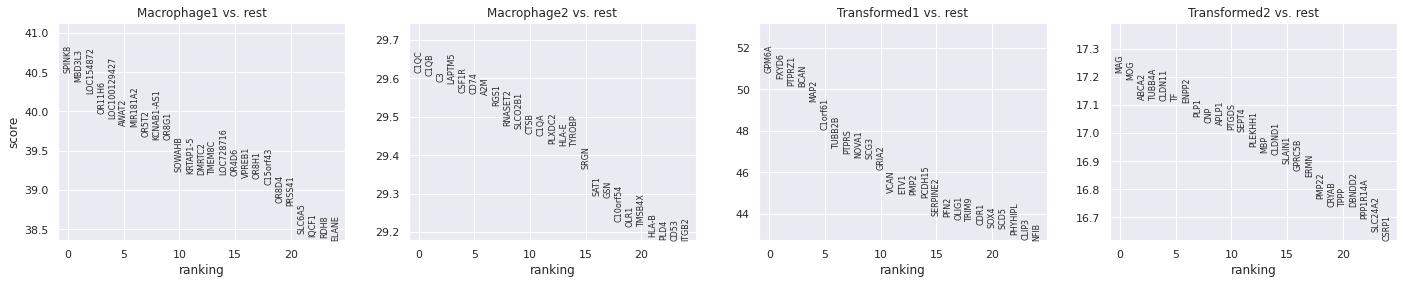

,Macrophage1,Macrophage2,Transformed1,Transformed2
0,SPINK8,C1QC,GPM6A,MAG
1,MBD3L3,C1QB,FXYD6,MOG
2,LOC154872,C3,PTPRZ1,ABCA2
3,OR11H6,LAPTM5,BCAN,TUBB4A
4,LOC100129427,CSF1R,MAP2,CLDN11
5,AWAT2,CD74,C1orf61,TF
6,MIR181A2,A2M,TUBB2B,ENPP2
7,OR5T2,RGS1,PTPRS,PLP1
8,KCNAB1-AS1,RNASET2,NOVA1,CNP
9,OR8G1,SLCO2B1,SCG3,APLP1


In [40]:
sc.tl.rank_genes_groups(adata_mtx, groupby='Cluster_ID', method='wilcoxon', n_genes=adata_mtx.shape[1])
sc.pl.rank_genes_groups(adata_mtx, n_genes=25, sharey=False)
pd.DataFrame(adata_mtx.uns['rank_genes_groups']['names']).head(20)

Save the top 100 DEGs as "marker genes" (genes of interest) to file

In [54]:
marker_genes_df = pd.DataFrame(adata_mtx.uns['rank_genes_groups']['names']).head(100)
marker_genes_df.to_csv(data_path + 'cluster_marker_genes.csv', index=False,header=True)

Save the preprocessed, batch-normalized matrix with cluster ID

In [70]:
mtx['Cluster_ID'] = annotation['leiden']
mtx.to_csv(data_path + 'batchnorm_counts.csv', index=True, header=True)

---